中文字体 'simkai.ttf' 加载成功。
英文字体 'times.ttf' 加载成功。
数据 '2025-jiaoyubu-fenci.csv' 加载成功。

图表已成功生成并保存至: /kaggle/working/discipline_distribution_analysis.png


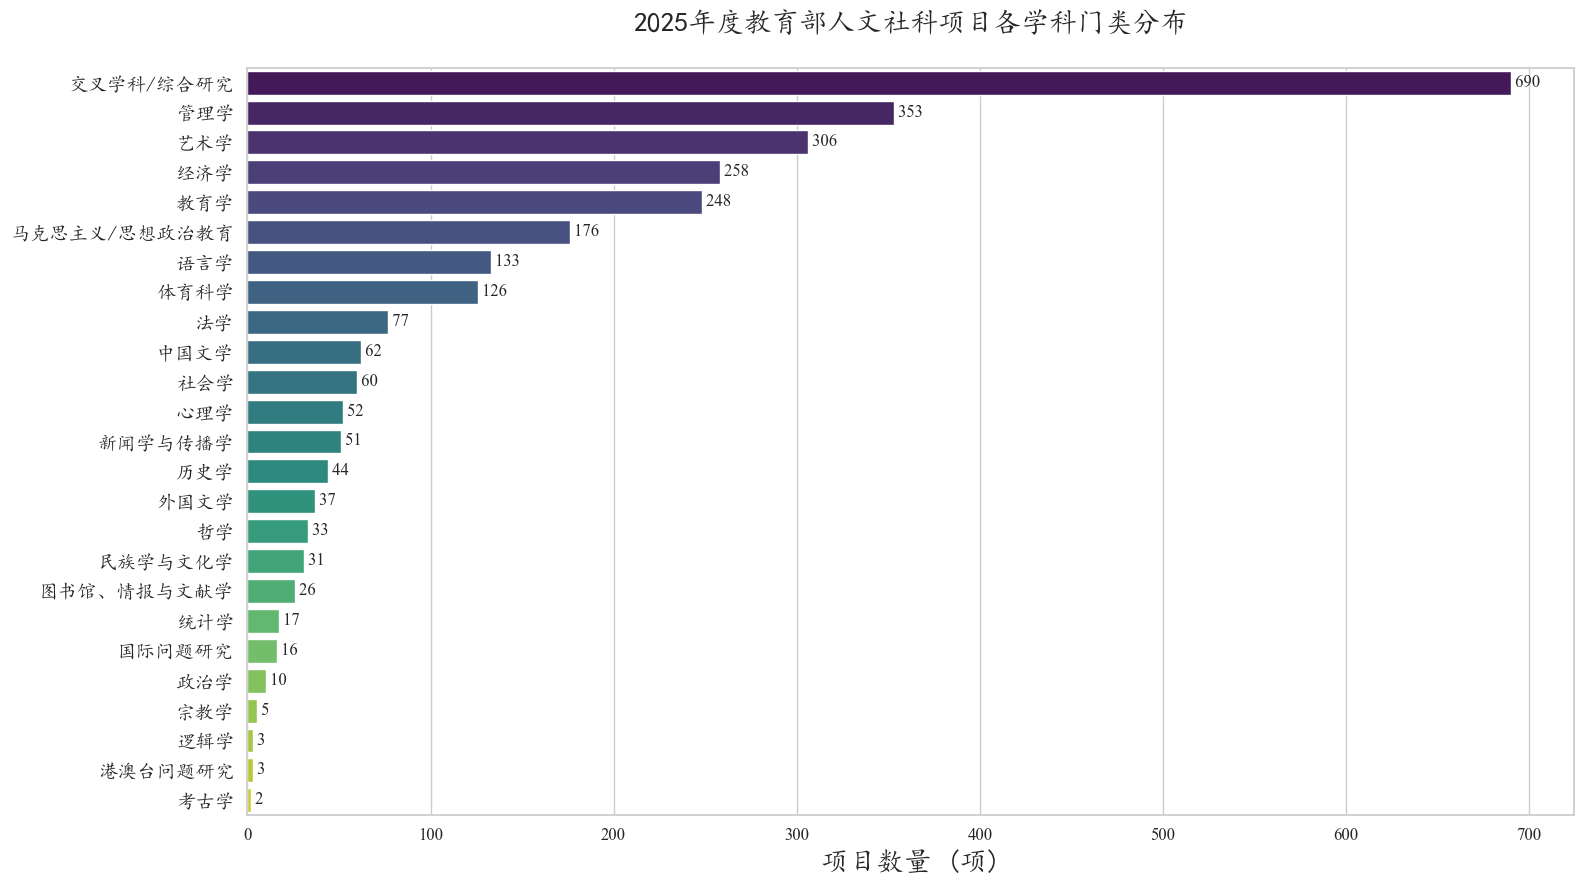

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
import os

# --- 1. 设置文件路径 ---
# !!请根据您在Kaggle中上传文件的实际路径，修改以下三个变量!!
DATA_FILE_PATH = '/kaggle/input/fundings/2025-jiaoyubu-fenci.csv'
CHINESE_FONT_PATH = '/kaggle/input/fundings/simkai.ttf'
ENGLISH_FONT_PATH = '/kaggle/input/fundings/times.ttf'

# --- 2. 加载自定义字体 ---
# 加载中文字体 (楷体)
# 使用FontProperties加载外部字体文件
try:
    chinese_font = FontProperties(fname=CHINESE_FONT_PATH, size=20)
    chinese_font_ticks = FontProperties(fname=CHINESE_FONT_PATH, size=14)
    print(f"中文字体 '{os.path.basename(CHINESE_FONT_PATH)}' 加载成功。")
except FileNotFoundError:
    print(f"错误：未在路径 '{CHINESE_FONT_PATH}' 找到中文字体文件。请检查路径。")
    chinese_font, chinese_font_ticks = None, None

# 加载英文字体 (Times New Roman)
try:
    english_font = FontProperties(fname=ENGLISH_FONT_PATH, size=16)
    english_font_ticks = FontProperties(fname=ENGLISH_FONT_PATH, size=12)
    print(f"英文字体 '{os.path.basename(ENGLISH_FONT_PATH)}' 加载成功。")
except FileNotFoundError:
    print(f"错误：未在路径 '{ENGLISH_FONT_PATH}' 找到英文字体文件。请检查路径。")
    english_font, english_font_ticks = None, None

# --- 3. 数据加载与处理 ---
try:
    df = pd.read_csv(DATA_FILE_PATH)
    print(f"数据 '{os.path.basename(DATA_FILE_PATH)}' 加载成功。")
    
    # 计算每个学科门类的项目数量
    subject_counts = df['学科门类'].value_counts()

    # --- 4. 可视化绘图 ---
    # 设置图表的美学风格
    sns.set_theme(style="whitegrid")

    # 创建一个16:9比例的图布
    plt.figure(figsize=(16, 9))

    # 绘制横向柱状图
    ax = sns.barplot(
        x=subject_counts.values, 
        y=subject_counts.index, 
        palette="viridis", # 选择一个美观的色板
        orient='h'
    )

    # --- 5. 设置图表元素与字体 ---
    # 设置图表标题及其字体
    if chinese_font:
        ax.set_title(
            '2025年度教育部人文社科项目各学科门类分布', 
            fontproperties=chinese_font, 
            pad=25 # 增加标题和图表的间距
        )

    # 设置X轴（数量）标签及其字体
    if english_font:
        ax.set_xlabel('项目数量 (项)', fontproperties=chinese_font)
    
    # Y轴（学科门类）标签默认由Seaborn生成，无需单独设置
    ax.set_ylabel('')

    # 设置坐标轴刻度的字体
    # Y轴刻度（中文）
    if chinese_font_ticks:
        for label in ax.get_yticklabels():
            label.set_fontproperties(chinese_font_ticks)
    
    # X轴刻度（数字，属于非中文）
    if english_font_ticks:
        for label in ax.get_xticklabels():
            label.set_fontproperties(english_font_ticks)

    # 在每个柱状条上显示具体的数值
    for index, value in enumerate(subject_counts.values):
        ax.text(value, index, f' {value}', va='center', fontproperties=english_font_ticks)

    # 优化布局，防止标签被截断
    plt.tight_layout()

    # --- 6. 保存高清图片 ---
    # Kaggle的输出目录是 /kaggle/working/
    output_path = '/kaggle/working/discipline_distribution_analysis.png'
    plt.savefig(output_path, dpi=300) # 保存为300 DPI的高清PNG图片

    print(f"\n图表已成功生成并保存至: {output_path}")
    # 在Kaggle Notebook中直接显示图片
    plt.show()

except FileNotFoundError:
    print(f"错误：未在路径 '{DATA_FILE_PATH}' 找到数据文件。请检查路径。")
except Exception as e:
    print(f"处理过程中发生错误: {e}")

中文字体 'simkai.ttf' 加载成功。
英文字体 'times.ttf' 加载成功。
数据 '2025-jiaoyubu-fenci.csv' 加载成功。

图表已成功生成并保存至: /kaggle/working/project_category_analysis_revised_smallpie.png


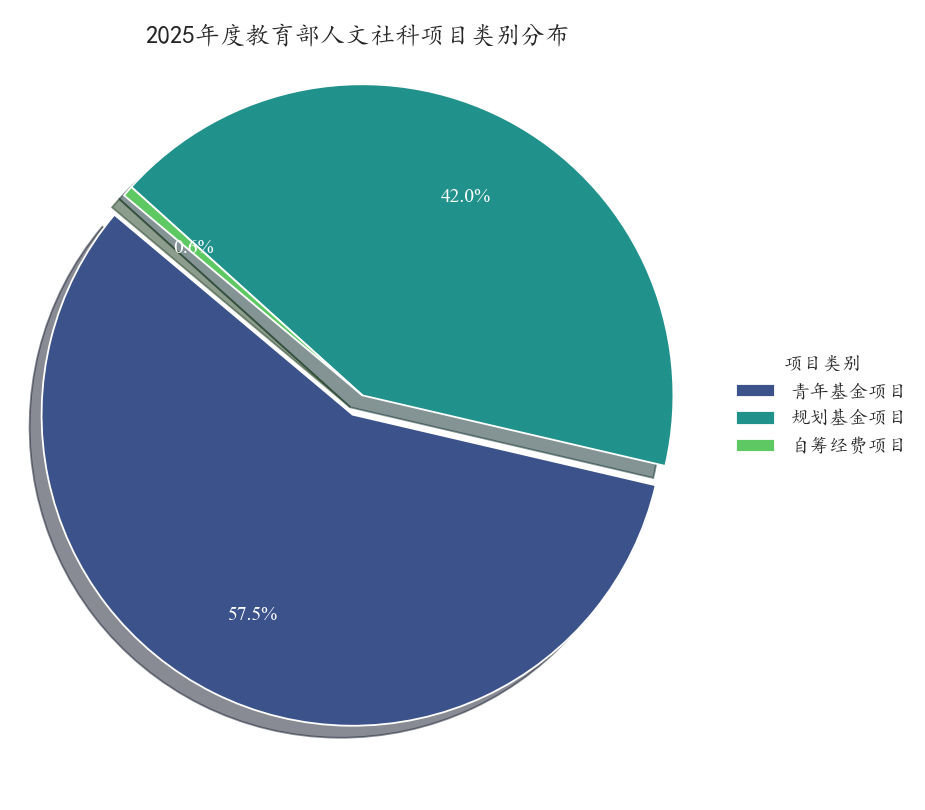

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
import os

# --- 1. 设置文件路径 ---
DATA_FILE_PATH = '/kaggle/input/fundings/2025-jiaoyubu-fenci.csv'
CHINESE_FONT_PATH = '/kaggle/input/fundings/simkai.ttf'
ENGLISH_FONT_PATH = '/kaggle/input/fundings/times.ttf'

# --- 2. 加载自定义字体 ---
try:
    chinese_font_title = FontProperties(fname=CHINESE_FONT_PATH, size=18, weight='bold')
    chinese_font_legend = FontProperties(fname=CHINESE_FONT_PATH, size=14)
    print(f"中文字体 '{os.path.basename(CHINESE_FONT_PATH)}' 加载成功。")
except FileNotFoundError:
    print(f"错误：未在路径 '{CHINESE_FONT_PATH}' 找到中文字体文件。")
    chinese_font_title, chinese_font_legend = None, None

try:
    english_font_percent = FontProperties(fname=ENGLISH_FONT_PATH, size=14, weight='bold')
    print(f"英文字体 '{os.path.basename(ENGLISH_FONT_PATH)}' 加载成功。")
except FileNotFoundError:
    print(f"错误：未在路径 '{ENGLISH_FONT_PATH}' 找到英文字体文件。")
    english_font_percent = None

# --- 3. 数据加载与处理 ---
try:
    df = pd.read_csv(DATA_FILE_PATH)
    print(f"数据 '{os.path.basename(DATA_FILE_PATH)}' 加载成功。")

    category_counts = df['项目类别'].value_counts()

    # --- 4. 可视化绘图 ---
    sns.set_theme(style="whitegrid")

    # 变更①：整体画布小一些
    fig, ax = plt.subplots(figsize=(10, 10))

    colors = sns.color_palette("viridis", len(category_counts))
    explode = [0.05 if label == '青年基金项目' else 0 for label in category_counts.index]

    # 变更②：调小 radius；变更③：百分比更靠内（pctdistance）
    wedges, texts, autotexts = ax.pie(
        category_counts,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        explode=explode,
        shadow=True,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1.3},
        radius=0.72,              # <-- 从 0.90 降到 0.72
        pctdistance=0.72          # <-- 百分比文本更靠内
        # 可选：做成“细环形”让视觉更“轻”，把下一行解除注释
        # , wedgeprops={'edgecolor':'white','linewidth':1.3,'width':0.35}  # 环形/甜甜圈
    )

    # 标题与饼图距离保持紧凑
    title_kwargs = dict(pad=4)
    if chinese_font_title:
        title_kwargs['fontproperties'] = chinese_font_title
    ax.set_title('2025年度教育部人文社科项目类别分布', y=0.95, **title_kwargs)

    # 百分比文字
    if english_font_percent:
        for autotext in autotexts:
            autotext.set_fontproperties(english_font_percent)
            autotext.set_color('white')

    ax.axis('equal')  # 保持为正圆

    # 图例靠右，不挤压主图
    if chinese_font_legend:
        legend = ax.legend(
            wedges, category_counts.index,
            title="项目类别",
            loc="center left",
            bbox_to_anchor=(1.02, 0.5),
            prop=chinese_font_legend,
            frameon=False
        )
        plt.setp(legend.get_title(), fontproperties=chinese_font_legend)

    # 变更④：收紧边距（给右侧图例更多空间，也让饼图显得更小更居中）
    plt.subplots_adjust(top=0.90, right=0.82)

    # --- 5. 保存高清图片 ---
    output_path = '/kaggle/working/project_category_analysis_revised_smallpie.png'
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    print(f"\n图表已成功生成并保存至: {output_path}")

    plt.show()

except FileNotFoundError:
    print(f"错误：未在路径 '{DATA_FILE_PATH}' 找到数据文件。")
except Exception as e:
    print(f"处理过程中发生错误: {e}")


中英文自定义字体加载成功。
数据 '2025-jiaoyubu-fenci.csv' 加载成功。

正在生成图表一：立项数量排名前20高校...
图表一已成功保存至: /kaggle/working/top20_universities_analysis.png


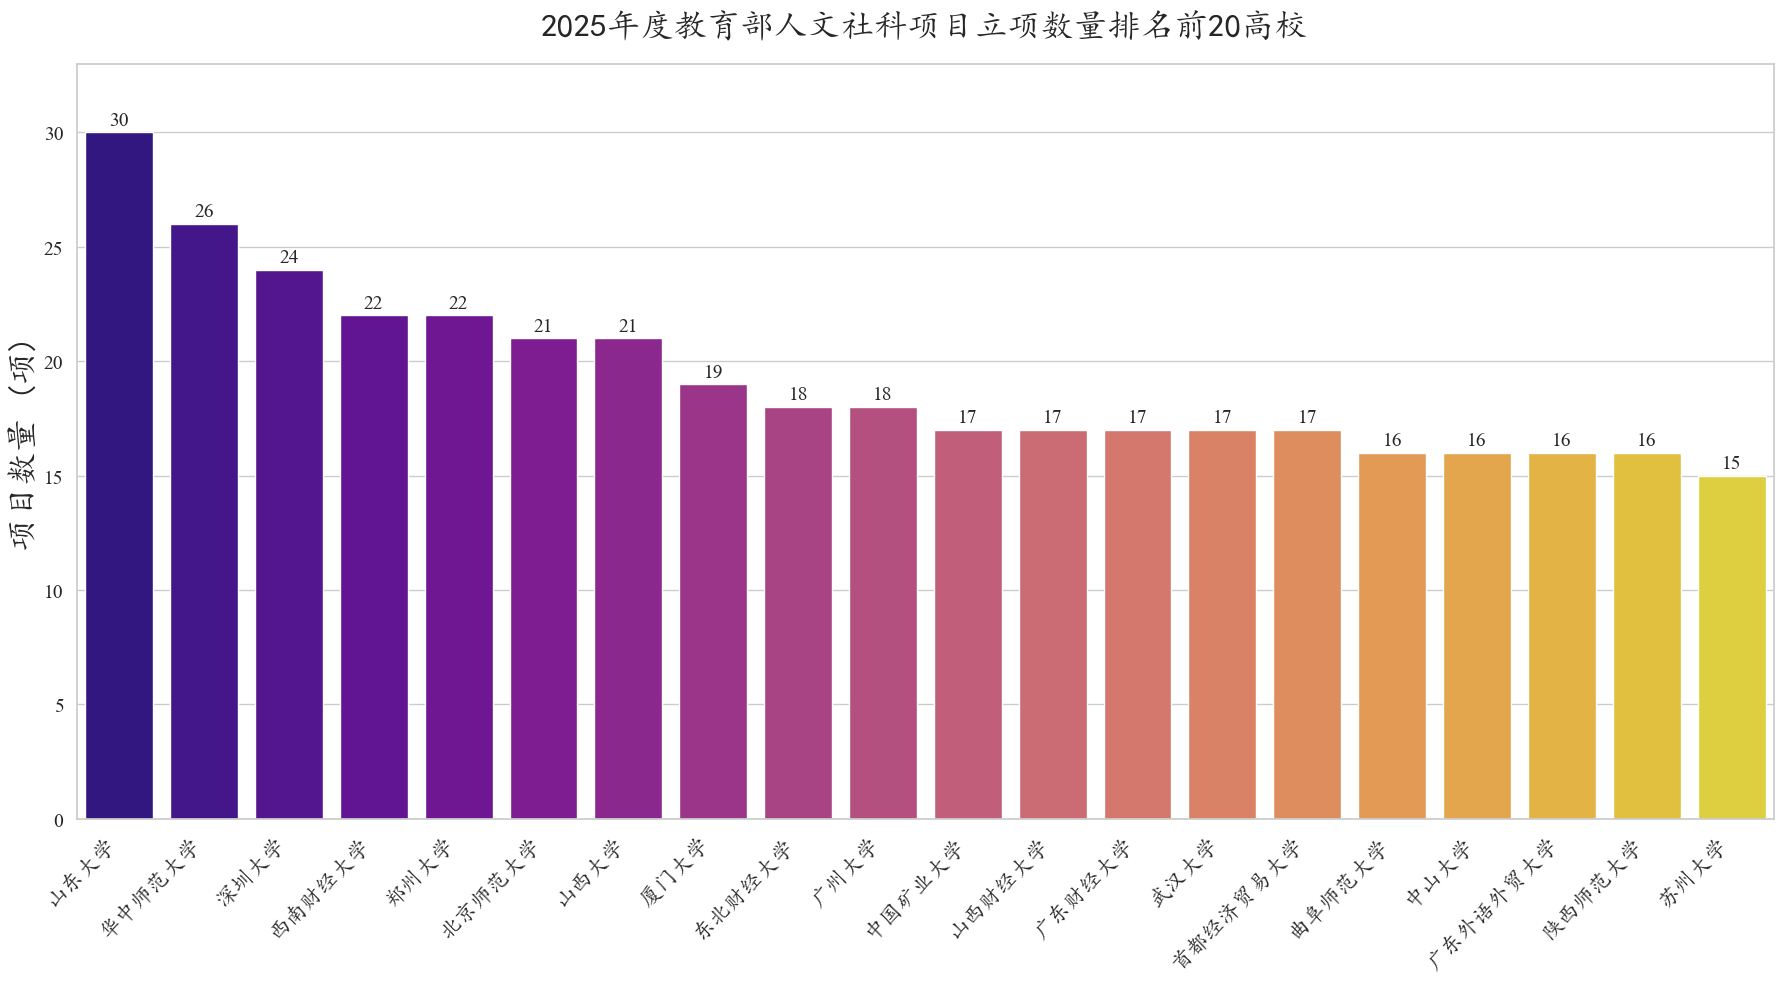


正在生成图表二：各省份立项数量分布...
图表二已成功保存至: /kaggle/working/province_distribution_analysis.png


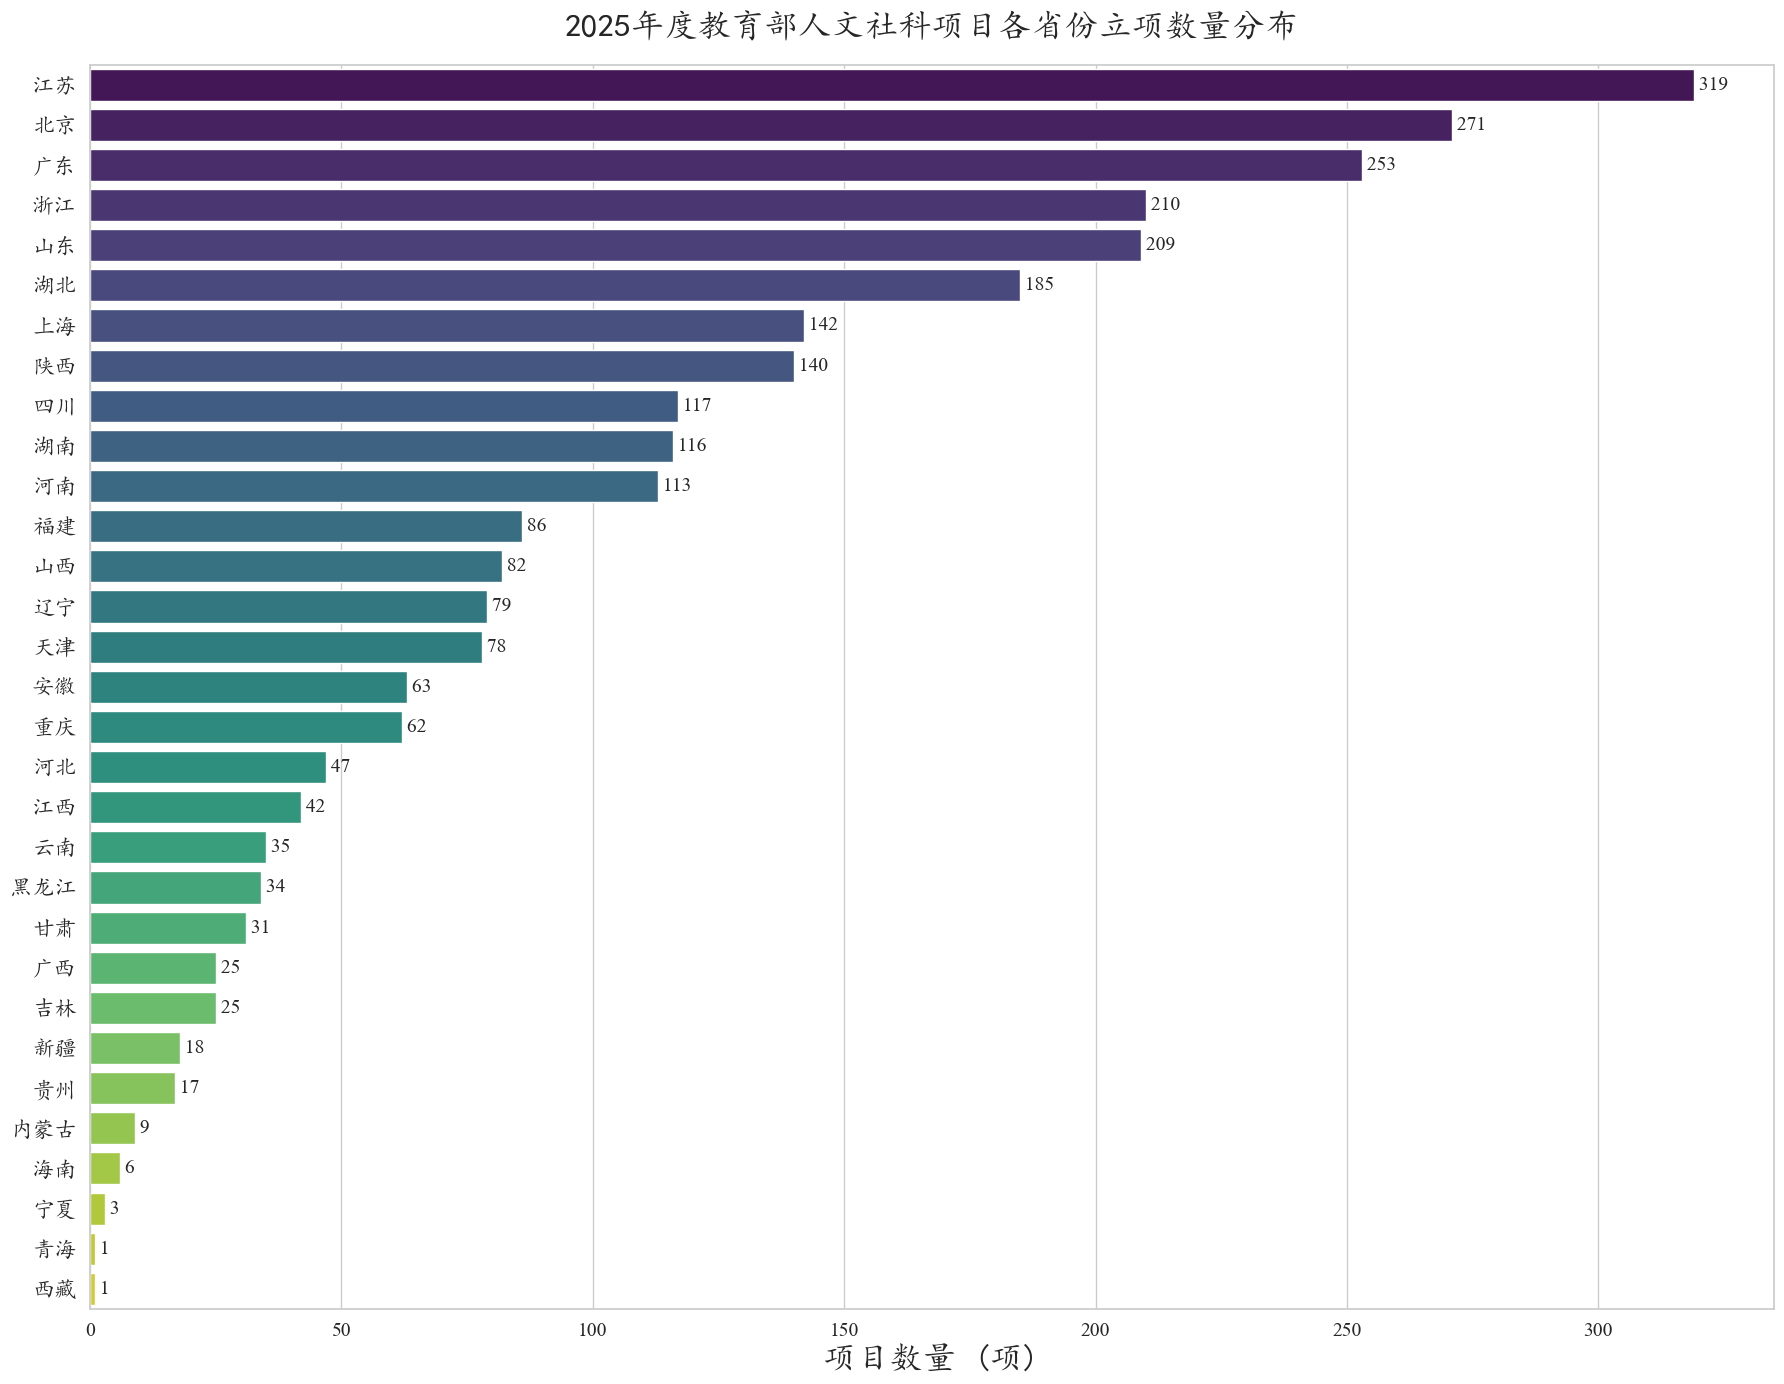

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
import os

# --- 1. 设置文件路径 ---
# !!请根据您在Kaggle中上传文件的实际路径，修改以下三个变量!!
DATA_FILE_PATH = '/kaggle/input/fundings/2025-jiaoyubu-fenci.csv'
CHINESE_FONT_PATH = '/kaggle/input/fundings/simkai.ttf'
ENGLISH_FONT_PATH = '/kaggle/input/fundings/times.ttf'

# --- 2. 加载自定义字体 ---
# 预加载所有需要的字体样式
try:
    # 中文字体
    chinese_font_title = FontProperties(fname=CHINESE_FONT_PATH, size=24, weight='bold')
    chinese_font_labels = FontProperties(fname=CHINESE_FONT_PATH, size=16)
    
    # 英文字体
    english_font_title = FontProperties(fname=ENGLISH_FONT_PATH, size=18, weight='bold')
    english_font_ticks = FontProperties(fname=ENGLISH_FONT_PATH, size=14)
    
    print("中英文自定义字体加载成功。")
except Exception as e:
    print(f"字体加载失败，请检查路径: {e}")
    # 设置为None，以便后续代码可以安全执行（但不会显示中文）
    chinese_font_title, chinese_font_labels, english_font_title, english_font_ticks = [None]*4

# --- 3. 数据加载 ---
try:
    df = pd.read_csv(DATA_FILE_PATH)
    print(f"数据 '{os.path.basename(DATA_FILE_PATH)}' 加载成功。")

    # --- 图表一：机构分析 (Top 20 高校) ---
    print("\n正在生成图表一：立项数量排名前20高校...")
    
    # 数据处理
    school_counts = df['学校名称'].value_counts().nlargest(20)
    
    # 绘图
    plt.figure(figsize=(18, 10))
    sns.set_theme(style="whitegrid")
    ax1 = sns.barplot(x=school_counts.index, y=school_counts.values, palette="plasma")
    
    # 设置图表元素与字体
    if chinese_font_title:
        ax1.set_title('2025年度教育部人文社科项目立项数量排名前20高校', fontproperties=chinese_font_title, pad=20)
    if english_font_title:
        ax1.set_ylabel('项目数量 (项)', fontproperties=chinese_font_title)
    ax1.set_xlabel('') # X轴是高校名称，无需标签

    # 设置刻度字体
    if chinese_font_labels:
        ax1.set_xticklabels(ax1.get_xticklabels(), fontproperties=chinese_font_labels, rotation=45, ha='right')
    if english_font_ticks:
        for label in ax1.get_yticklabels():
            label.set_fontproperties(english_font_ticks)
    # 【新增功能】在每个柱子的顶部显示数值
    if english_font_ticks:
        for p in ax1.patches:
            ax1.annotate(
                f'{int(p.get_height())}', # 要显示的文本 (项目数)
                (p.get_x() + p.get_width() / 2., p.get_height()), # 文本的位置 (柱子顶部中央)
                ha = 'center', # 水平居中
                va = 'center', # 垂直居中
                xytext = (0, 9), # 文本偏移量 (向上偏移9个点)
                textcoords = 'offset points', # 偏移量的坐标系
                fontproperties=english_font_ticks # 应用字体
            )
            
    # 调整Y轴上限，为顶部的数字留出空间
    ax1.set_ylim(0, school_counts.max() * 1.1)

    # 优化布局并保存
    plt.tight_layout()
    output_path1 = '/kaggle/working/top20_universities_analysis.png'
    plt.savefig(output_path1, dpi=300)
    print(f"图表一已成功保存至: {output_path1}")
    plt.show()


    # --- 图表二：地域分析 (各省份立项数量) ---
    print("\n正在生成图表二：各省份立项数量分布...")

    # 数据处理
    province_counts = df['省份'].value_counts()
    
    # 绘图
    plt.figure(figsize=(18, 14))
    sns.set_theme(style="whitegrid")
    ax2 = sns.barplot(x=province_counts.values, y=province_counts.index, palette="viridis", orient='h')

    # 设置图表元素与字体
    if chinese_font_title:
        ax2.set_title('2025年度教育部人文社科项目各省份立项数量分布', fontproperties=chinese_font_title, pad=20)
    if english_font_title:
        ax2.set_xlabel('项目数量 (项)', fontproperties=chinese_font_title)
    ax2.set_ylabel('') # Y轴是省份名称，无需标签

    # 设置刻度字体
    if chinese_font_labels:
        for label in ax2.get_yticklabels():
            label.set_fontproperties(chinese_font_labels)
    if english_font_ticks:
        for label in ax2.get_xticklabels():
            label.set_fontproperties(english_font_ticks)
    
    # 在每个柱状条上显示数值
    for index, value in enumerate(province_counts.values):
        ax2.text(value, index, f' {value}', va='center', fontproperties=english_font_ticks)

    # 优化布局并保存
    plt.tight_layout()
    output_path2 = '/kaggle/working/province_distribution_analysis.png'
    plt.savefig(output_path2, dpi=300)
    print(f"图表二已成功保存至: {output_path2}")
    plt.show()

except FileNotFoundError:
    print(f"错误：未在路径 '{DATA_FILE_PATH}' 找到数据文件。请检查路径。")
except Exception as e:
    print(f"处理过程中发生错误: {e}")

中英文自定义字体加载成功。
数据 '2025-jiaoyubu-fenci.csv' 加载成功。

正在生成图表一：“双一流”与普通院校立项数量对比...
图表一已成功保存至: /kaggle/working/university_tier_comparison.png


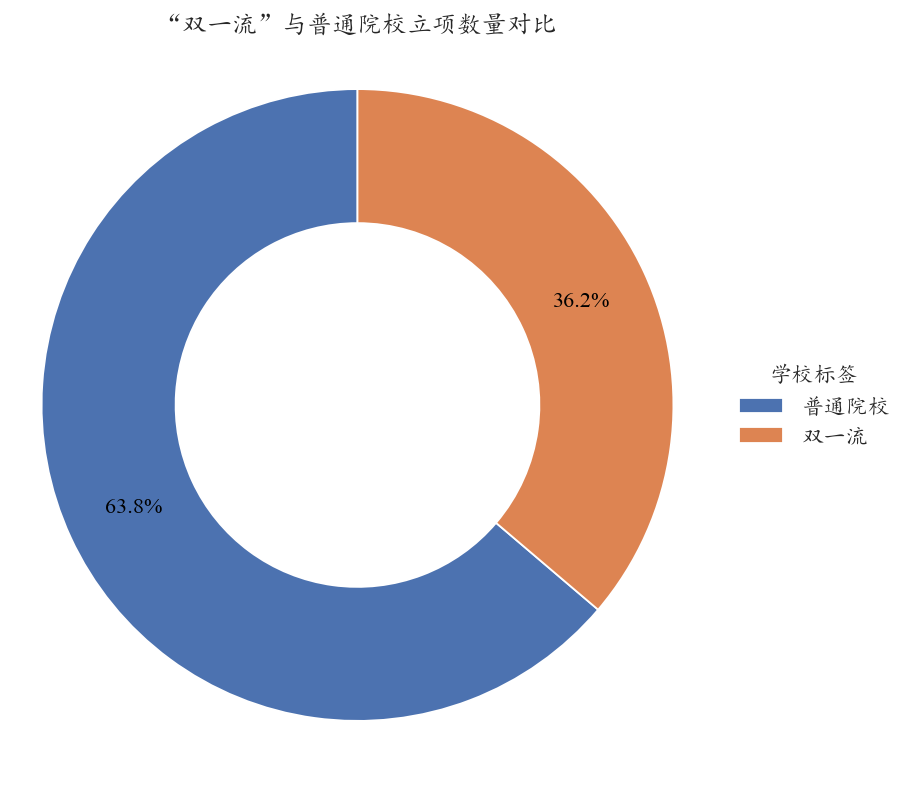


正在生成图表二：各地区立项数量分布...
图表二已成功保存至: /kaggle/working/region_distribution_analysis.png


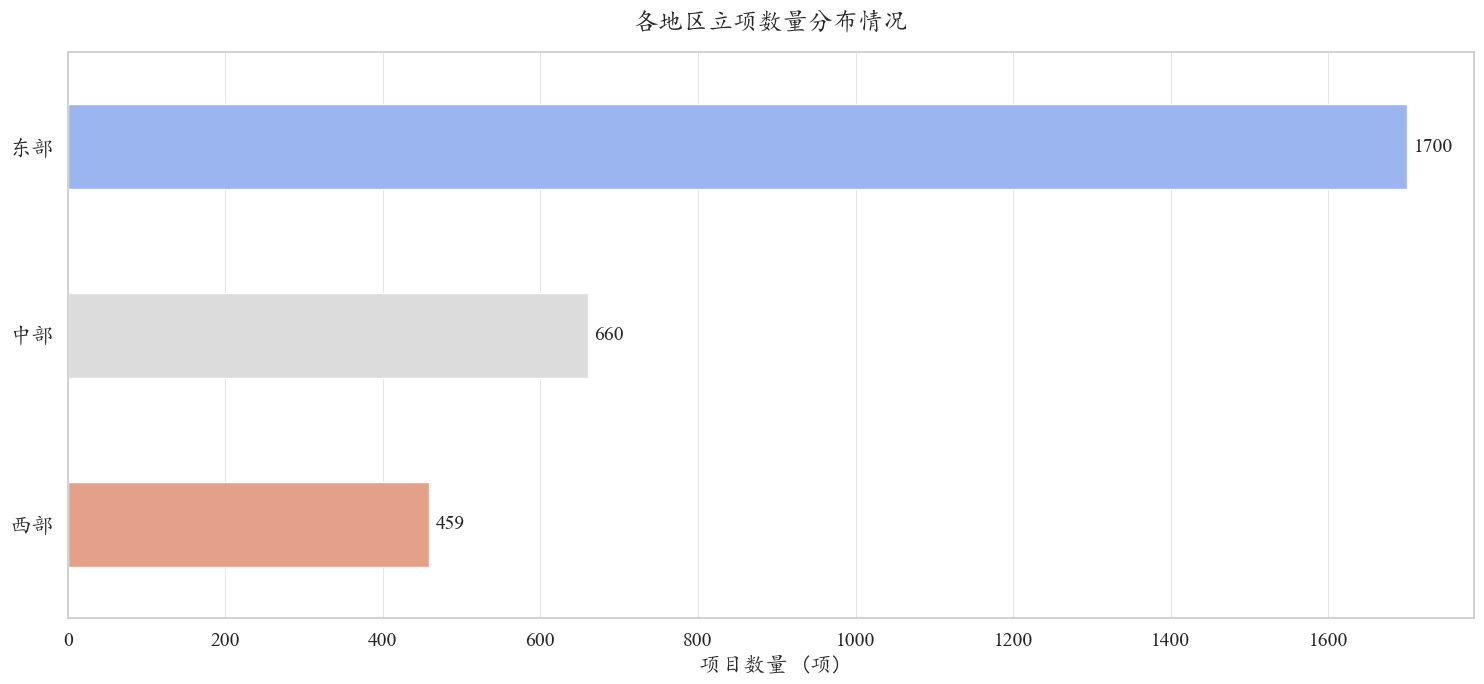

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
import os

# --- 1. 路径（保持你的原值） ---
DATA_FILE_PATH = '/kaggle/input/fundings/2025-jiaoyubu-fenci.csv'
CHINESE_FONT_PATH = '/kaggle/input/fundings/simkai.ttf'
ENGLISH_FONT_PATH = '/kaggle/input/fundings/times.ttf'

# --- 2. 加载自定义字体 ---
try:
    # 中文字体
    chinese_font_title = FontProperties(fname=CHINESE_FONT_PATH, size=18, weight='bold')
    chinese_font_labels = FontProperties(fname=CHINESE_FONT_PATH, size=16)
    
    # 英文字体
    english_font_title = FontProperties(fname=ENGLISH_FONT_PATH, size=18, weight='bold')
    english_font_percent = FontProperties(fname=ENGLISH_FONT_PATH, size=16, weight='bold')
    english_font_ticks = FontProperties(fname=ENGLISH_FONT_PATH, size=14)
    
    print("中英文自定义字体加载成功。")
except Exception as e:
    print(f"字体加载失败，请检查路径: {e}")
    chinese_font_title = chinese_font_labels = english_font_title = english_font_percent = english_font_ticks = None

# --- 3. 数据加载 ---
try:
    df = pd.read_csv(DATA_FILE_PATH)
    print(f"数据 '{os.path.basename(DATA_FILE_PATH)}' 加载成功。")

    # --- 图表一：“双一流”与普通院校立项数量对比 (圆环图) ---
    print("\n正在生成图表一：“双一流”与普通院校立项数量对比...")
    
    # 数据处理：过滤空值或未知标签
    known_tags = ['双一流', '普通院校']
    df_filtered = df[df['学校标签'].isin(known_tags)]
    tag_counts = df_filtered['学校标签'].value_counts()

    sns.set_theme(style="whitegrid")

    # ★ 变更A：使用 axes 绘图，便于精确控制半径与边距
    fig, ax = plt.subplots(figsize=(10, 10))  # 可按需再调小画布，如 (9,9)

    # ★ 变更B：改用环形参数而非加白色圆；减小半径 radius，缩小视觉占比
    #   radius 控制环整体大小；width 控制环的“粗细”
    wedges, texts, autotexts = ax.pie(
        tag_counts,
        labels=None,                 # 不直接绘制标签，只显示百分比
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.78,           # 百分比更靠内，让画面更紧凑
        radius=0.66,                # ★ 从默认(1.0)降到 0.66 -> 圆环更小
        wedgeprops={
            'edgecolor': 'white',
            'linewidth': 1.3,
            'width': 0.28           # ★ 环的厚度，数值越小越“细”
        }
        # 不再需要 colors/palette 也可；若想固定配色可自行加 colors=...
    )

    # 标题
    if chinese_font_title:
        ax.set_title('“双一流”与普通院校立项数量对比',
                     fontproperties=chinese_font_title,
                     pad=6, y=0.96)  # 标题更贴近主体

    # 百分比字体
    if english_font_percent:
        for t in autotexts:
            t.set_fontproperties(english_font_percent)
            t.set_color('black')    # 圆环较细，黑字更清晰；可按需改为白色

    # ★ 变更C：图例靠右，并收紧右边距，避免压缩主图
    if chinese_font_labels:
        legend = ax.legend(
            wedges, tag_counts.index,
            title="学校标签",
            loc="center left",
            bbox_to_anchor=(1.02, 0.5),
            frameon=False,
            prop=chinese_font_labels
        )
        plt.setp(legend.get_title(), fontproperties=chinese_font_labels)

    ax.axis('equal')  # 保持正圆
    plt.subplots_adjust(top=0.90, right=0.82)  # ★ 变更D：为右侧图例留白

    # 保存高清图片
    output_path1 = '/kaggle/working/university_tier_comparison.png'
    plt.savefig(output_path1, dpi=300, bbox_inches='tight')
    print(f"图表一已成功保存至: {output_path1}")
    plt.show()

    # --- 图表二：各地区立项数量分布 (横向柱状图) ---
    # --- 图表二：各地区立项数量分布 (横向柱状图) ---
    print("\n正在生成图表二：各地区立项数量分布...")
    
    # 数据处理
    region_counts = df['地区'].value_counts()
    
    # 画布略小一点，柱更细
    plt.figure(figsize=(15, 7))  # 原 16x8 -> 15x7，让整体更紧凑
    sns.set_theme(style="whitegrid")
    
    # 关键：把 width 调小（默认 0.8）
    ax2 = sns.barplot(
        x=region_counts.values,
        y=region_counts.index,
        palette="coolwarm",
        orient='h',
        width=0.45    # ← 柱子更细；可继续调到 0.35 甚至 0.30
    )
    
    # 标题与轴标签
    if chinese_font_title:
        ax2.set_title('各地区立项数量分布情况', fontproperties=chinese_font_title, pad=16)
    
    # 用中文标签字体作为 x 轴标题字体（更协调）
    ax2.set_xlabel('项目数量 (项)', fontproperties=(chinese_font_labels or chinese_font_title))
    ax2.set_ylabel('')
    
    # 刻度字体
    if chinese_font_labels:
        for label in ax2.get_yticklabels():
            label.set_fontproperties(chinese_font_labels)
    if english_font_ticks:
        for label in ax2.get_xticklabels():
            label.set_fontproperties(english_font_ticks)
    
    # 在每个柱状条末端显示数值（留出微小间距，避免紧贴柱边）
    for index, value in enumerate(region_counts.values):
        ax2.text(
            value + max(region_counts.values)*0.005,  # 小幅右移
            index,
            f'{value}',
            va='center',
            fontproperties=(english_font_ticks or chinese_font_labels)
        )
    
    # 让网格线更轻一点（可选）
    ax2.xaxis.grid(True, linestyle='-', linewidth=0.6, alpha=0.6)
    ax2.yaxis.grid(False)
    
    plt.tight_layout()
    output_path2 = '/kaggle/working/region_distribution_analysis.png'
    plt.savefig(output_path2, dpi=300)
    print(f"图表二已成功保存至: {output_path2}")
    plt.show()


except FileNotFoundError:
    print(f"错误：未在路径 '{DATA_FILE_PATH}' 找到数据文件。请检查路径。")
except Exception as e:
    print(f"处理过程中发生错误: {e}")
